In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
bolus_data = pd.read_csv('/cluster/home/faltysm/source/2020_VolumeChallenge/data/cohort_reasons_fb.csv')

In [3]:
bolus_data.columns

Index(['id', 'idtag', 'age', 'female', 'elective', 'diagnosisdetail',
       'admdiagnosis', 'apache4', 'saps2', 'icuday_n', 'height', 'weight',
       'DateTime', 'PreparationName', 'alive', 'r_lobp', 'r_louo', 'r_locvp',
       'r_loci', 'r_hilac', 'r_hinor', 'r_hippv', 'r_losvo2', 'r_poorperf',
       'r_other', 'r_fluidbalance', 'r_tachy', 'r_fever', 'fluid_ml', 'x',
       'n_reasons'],
      dtype='object')

In [4]:
bolus_data = bolus_data[bolus_data.diagnosisdetail.isin(["CABG + Doppelklappenchirurgie oder Klappen re-OP", "Herzklappenchirurgie (ohne CABG)", "CABG + Klappenchirurgie (einfach)","CABG"])]

In [5]:
bolus_data["fluid_gr"] = pd.cut(bolus_data.fluid_ml, bins=[250,350,500], include_lowest=True)

In [6]:
bolus_grouped = bolus_data.loc[bolus_data.n_reasons > 0,['r_lobp', 'r_louo', 'r_locvp',
       'r_loci', 'r_hilac', 'r_hinor', 'r_hippv', 'r_losvo2', 'r_poorperf',
       'r_other', 'r_fluidbalance', 'r_tachy', 'r_fever', 'fluid_gr']].groupby("fluid_gr").sum()
bolus_grouped["count"] = bolus_data.loc[bolus_data.n_reasons > 0].groupby("fluid_gr").count()["n_reasons"]
bolus_grouped["mean_ml"] = bolus_data.loc[bolus_data.n_reasons > 0].groupby("fluid_gr").fluid_ml.mean()

In [7]:
bolus_perc = bolus_grouped.loc[:,['r_lobp', 'r_louo', 'r_locvp',
       'r_loci', 'r_hilac', 'r_hinor', 'r_hippv', 'r_losvo2', 'r_poorperf',
       'r_other', 'r_fluidbalance', 'r_tachy', 'r_fever']].div(bolus_grouped["count"], axis=0)
bolus_perc["count"] = bolus_grouped["count"]
bolus_perc["avg_ml"] = bolus_grouped["mean_ml"]

<AxesSubplot:ylabel='fluid_gr'>

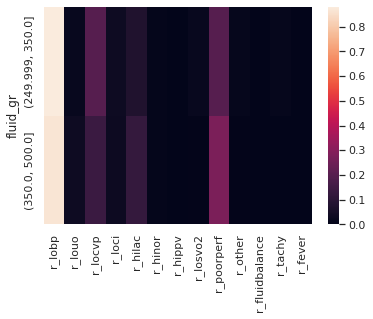

In [8]:
sns.heatmap(bolus_perc[['r_lobp', 'r_louo', 'r_locvp',
       'r_loci', 'r_hilac', 'r_hinor', 'r_hippv', 'r_losvo2', 'r_poorperf',
       'r_other', 'r_fluidbalance', 'r_tachy', 'r_fever']])

In [9]:
print(f"Patient count: {len(bolus_data.loc[(bolus_data.fluid_ml>=250)].id.unique())}")

Patient count: 126


In [10]:
print(f"Total bolus count: {bolus_data.loc[(bolus_data.fluid_ml>=250)].count()['fluid_ml']}")
print(f"Bolus without a reason: {bolus_data.loc[(bolus_data.n_reasons == 0) & (bolus_data.fluid_ml>=250)].count()['fluid_ml']}")

Total bolus count: 938
Bolus without a reason: 195


In [11]:
bolus_total_perc = bolus_data.loc[(bolus_data.fluid_ml>=250) & (bolus_data.n_reasons > 0),['r_lobp', 'r_louo', 'r_locvp',
       'r_loci', 'r_hilac', 'r_hinor', 'r_hippv', 'r_losvo2', 'r_poorperf',
       'r_other', 'r_fluidbalance', 'r_tachy', 'r_fever', 'fluid_gr']].sum()/bolus_data.loc[(bolus_data.fluid_ml>=250) & (bolus_data.n_reasons > 0)].count()['fluid_ml']
bolus_total_perc["count"] = bolus_data.loc[(bolus_data.fluid_ml>=250) & (bolus_data.n_reasons > 0)].count()['fluid_ml']
bolus_total_perc["avg_ml"] = bolus_data.loc[(bolus_data.fluid_ml>=250) & (bolus_data.n_reasons > 0)]["fluid_ml"].mean()

/scratch/3947490.tmpdir/ipykernel_4203/354946501.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bolus_total_perc = bolus_data.loc[(bolus_data.fluid_ml>=250) & (bolus_data.n_reasons > 0),['r_lobp', 'r_louo', 'r_locvp',


In [12]:
table = pd.concat ([bolus_perc.transpose(), bolus_total_perc], axis=1) 

In [15]:
table.to_csv("bolus_reasons.csv")

In [16]:
table

,"(249.999, 350.0]","(350.0, 500.0]",0
r_lobp,0.879397,0.863768,0.872140
r_louo,0.017588,0.031884,0.024226
r_locvp,0.195980,0.136232,0.168237
r_loci,0.032663,0.028986,0.030956
r_hilac,0.072864,0.121739,0.095559
r_hinor,0.007538,0.008696,0.008075
r_hippv,0.002513,0.000000,0.001346
r_losvo2,0.020101,0.005797,0.013459
r_poorperf,0.195980,0.275362,0.232840
r_other,0.012563,0.005797,0.009421
